In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
                                                        
from recommender import matrix_factorization

In [2]:
## Dummy dataset
a = np.array([

     [5,3,0,1],

     [4,0,0,1],

     [1,1,0,5],

     [1,0,0,4],

     [0,1,5,4],
    
     [2,1,3,0],

    ])

In [5]:
mse = []
for k in range(1, 51, 1):
    r = matrix_factorization(a,k)
    r.fit(iterations=500)
    mse.append(np.mean(r.mse))

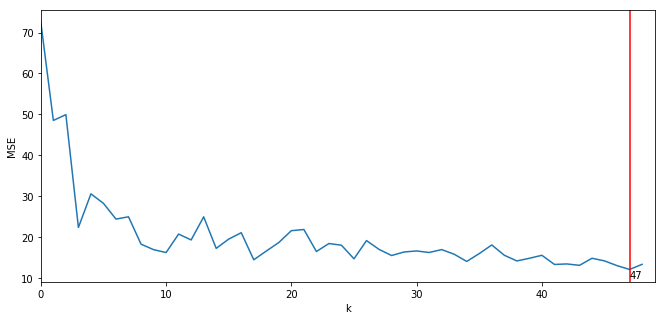

In [38]:
plt.figure(figsize=(11, 5))
plt.plot(mse)
plt.xlim(0,len(mse))
plt.xlabel("k")
plt.ylabel("MSE")
plt.axvline(np.argmin(mse), color = "r")
plt.annotate(f"{np.argmin(mse)}", xy=(np.argmin(mse),10))
plt.show()

In [31]:
## Best matrix with best k
k=np.argmin(mse)
recomm = matrix_factorization(a,k)

In [32]:
## Train the model
recomm.fit(iterations=1000)

In [33]:
## Get the Predicted matrix
recomm.matrix

array([[5.50602253, 3.4253596 , 0.52634787, 1.5147434 ],
       [4.49845554, 0.51866431, 0.49347274, 1.49631402],
       [1.50014515, 1.49813074, 0.50067085, 5.50036827],
       [1.49881292, 0.5145542 , 0.49488457, 4.49712438],
       [0.49662861, 1.54224758, 5.48502538, 4.4916553 ],
       [2.49993525, 1.50104358, 3.4995986 , 0.49979463]])

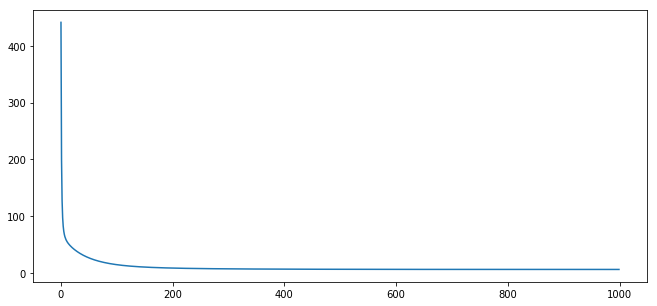

In [34]:
## Plot MSE over iterations
plt.figure(figsize=(11, 5))
plt.plot(recomm.mse)
plt.show()

## EDA

In [12]:
movies = pd.read_csv("https://raw.githubusercontent.com/carlosgeovany/MachineLearning/master/data/movies_metadata.csv", usecols=['id','title'])

In [13]:
ratings = pd.read_csv("https://raw.githubusercontent.com/carlosgeovany/MachineLearning/master/data/ratings_small.csv")

In [14]:
movies.head()

,id,title
0,862,Toy Story
1,8844,Jumanji
2,15602,Grumpier Old Men
3,31357,Waiting to Exhale
4,11862,Father of the Bride Part II


In [15]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      45466 non-null  object
 1   title   45460 non-null  object
dtypes: object(2)
memory usage: 710.5+ KB


In [16]:
##Columns not needed
ratings.drop('timestamp', axis=1, inplace=True)

In [17]:
## Order by movieId
ratings.sort_values('movieId', inplace=True)

In [18]:
## Remove float ratings by casting to int
ratings['rating'] = ratings['rating'].astype(int)

In [19]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100004 entries, 9713 to 80823
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   userId   100004 non-null  int64
 1   movieId  100004 non-null  int64
 2   rating   100004 non-null  int32
dtypes: int32(1), int64(2)
memory usage: 2.7 MB


In [20]:
ratings.head()

,userId,movieId,rating
9713,68,1,4
35933,261,1,1
52631,383,1,5
35983,262,1,2
12038,77,1,4


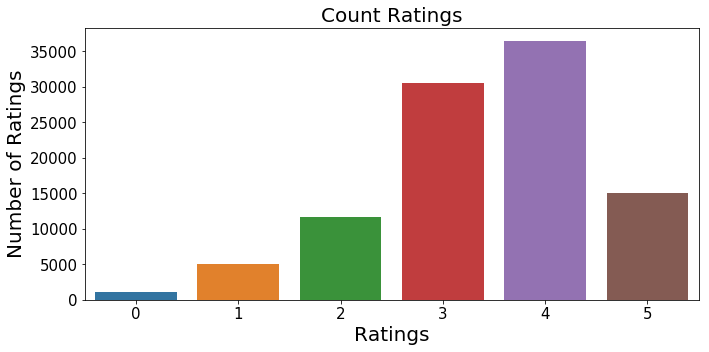

In [21]:
plt.figure(figsize = (11, 5))
sns.countplot(x="rating", data=ratings)
plt.tick_params(labelsize = 15)
plt.title("Count Ratings", fontsize = 20)
plt.xlabel("Ratings", fontsize = 20)
plt.ylabel("Number of Ratings", fontsize = 20)
plt.show()

In [22]:
## Group by userid and count the numbers of movies rated by that user
ratings.groupby("userId")["rating"].count().sort_values(ascending = False).head()

userId
547    2391
564    1868
624    1735
15     1700
73     1610
Name: rating, dtype: int64

In [23]:
## Group by movies and count the number of users rated that movie
ratings.groupby("movieId")["rating"].count().sort_values(ascending = False).head()

movieId
356    341
296    324
318    311
593    304
260    291
Name: rating, dtype: int64

In [24]:
## set userId as index
ratings = ratings.set_index('userId').sort_index(axis = 0)

In [25]:
ratings

,movieId,rating
userId,,
1,2455,2
1,1287,2
1,2968,1
1,1339,3
1,1172,4
...,...,...
671,1266,4
671,1197,3
671,4022,3


In [26]:
## pivot df to get the matrix Yai
ratings = ratings.pivot(index=ratings.index, columns='movieId')['rating']

In [27]:
## replace NAN with zero
ratings = ratings.fillna(0)

In [28]:
ratings

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
## Transform pandas df to numnpy array
ratings_array = ratings.to_numpy()

In [5]:
mse = []
for k in range(1, 51, 1):
    r = matrix_factorization(ratings_array,k)
    r.fit()
    mse.append(np.mean(r.mse))

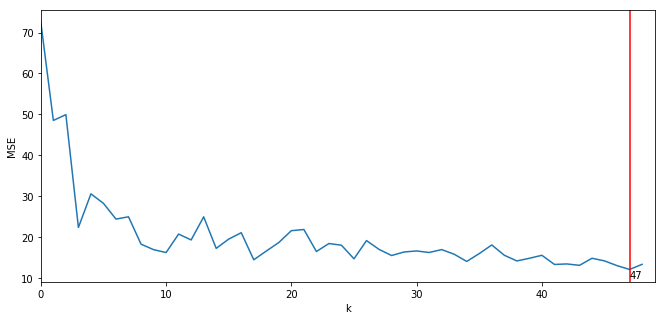

In [38]:
plt.figure(figsize=(11, 5))
plt.plot(mse)
plt.xlim(0,len(mse))
plt.xlabel("k")
plt.ylabel("MSE")
plt.axvline(np.argmin(mse), color = "r")
plt.annotate(f"{np.argmin(mse)}", xy=(np.argmin(mse),10))
plt.show()

In [31]:
## Best matrix with best k
k=np.argmin(mse)
recomm = matrix_factorization(ratings_array,k)

In [32]:
## Train the model
recomm.fit(iterations=1000)

In [33]:
## Get the Predicted matrix
recomm.matrix

array([[5.50602253, 3.4253596 , 0.52634787, 1.5147434 ],
       [4.49845554, 0.51866431, 0.49347274, 1.49631402],
       [1.50014515, 1.49813074, 0.50067085, 5.50036827],
       [1.49881292, 0.5145542 , 0.49488457, 4.49712438],
       [0.49662861, 1.54224758, 5.48502538, 4.4916553 ],
       [2.49993525, 1.50104358, 3.4995986 , 0.49979463]])

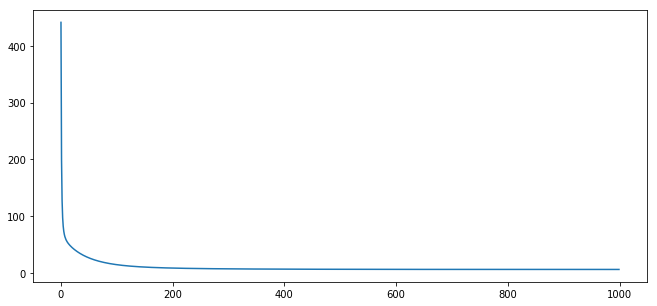

In [34]:
## Plot MSE over iterations
plt.figure(figsize=(11, 5))
plt.plot(recomm.mse)
plt.show()

In [ ]:
predictions = pd.DataFrame(recomm.matrix, columns = ratings.columns, index = ratings.index).round()